In [2]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random

2023-12-11 19:58:21.154035: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import json
from PIL import Image
import torch
from torchvision import transforms
from torch.utils.data import Subset, DataLoader
from torchvision.datasets import ImageFolder
from pytorch_pretrained_vit import ViT

In [4]:
# different emotion classes
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [5]:
#path to dataset
train_path = '/Users/varundinesh/Downloads/archive (3)/train/'

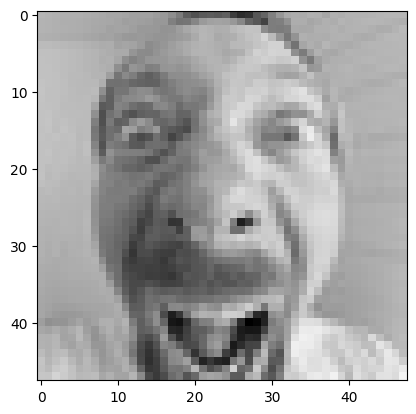

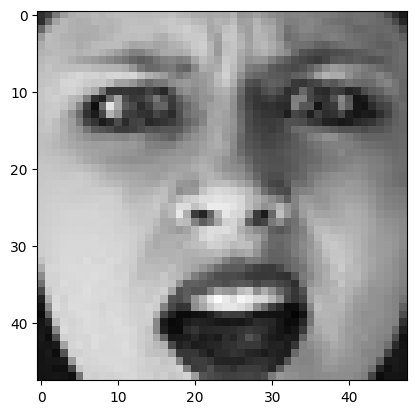

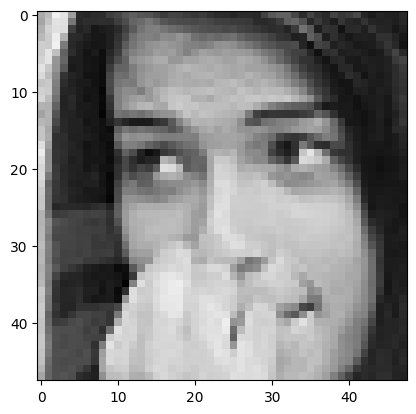

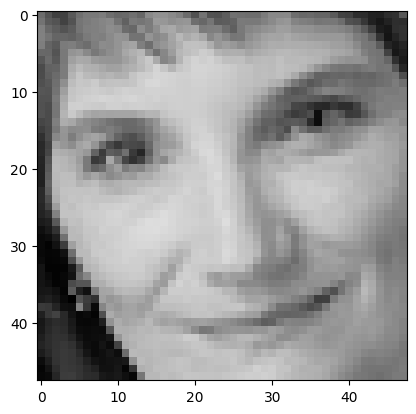

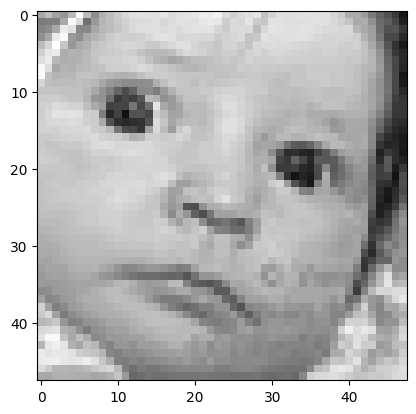

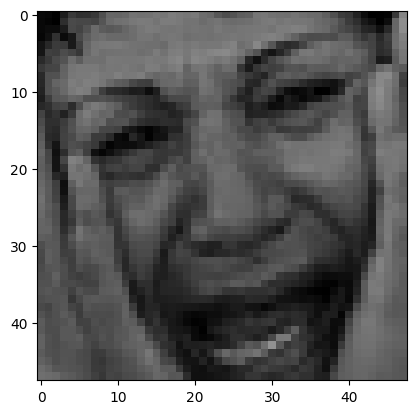

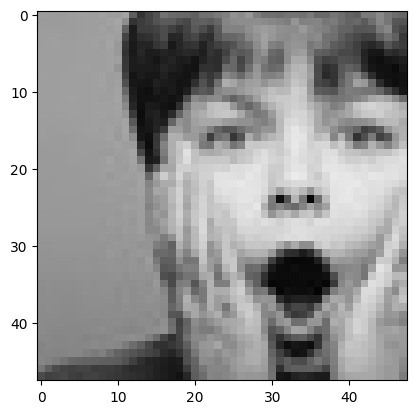

In [6]:
#print images 
for emo_class in classes:
    path = os.path.join(train_path, emo_class)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))
        plt.show()
        break # to only show the first image

In [7]:
# using vision transformer
transformer = transforms.Compose([transforms.Resize((384, 384)),transforms.ToTensor(),transforms.Normalize(0.5, 0.5),])
type(transformer)

torchvision.transforms.transforms.Compose

In [8]:
# create dataset from images folder
dataset = ImageFolder(root=train_path, transform=transformer)
dataset

Dataset ImageFolder
    Number of datapoints: 28709
    Root location: /Users/varundinesh/Downloads/archive (3)/train/
    StandardTransform
Transform: Compose(
               Resize(size=(384, 384), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [10]:
# Assuming 'dataset' is your original dataset
subset_ratio = 0.05  # Use a fraction of your dataset, adjust as needed
subset_size = int(subset_ratio * len(dataset))

# Create a list of indices for the subset
subset_indices = list(range(subset_size))

# Use the Subset class to create the smaller dataset
subset_dataset = Subset(dataset, subset_indices)

In [11]:
# Using Pytorch dataloader
batch_size = 120  
data_loader = DataLoader(subset_dataset, batch_size=batch_size, shuffle=True)

In [12]:
# pre-trained vision transformer model
model = ViT('B_16_imagenet1k', pretrained=True)


Loaded pretrained weights.


In [ ]:
all_embeddings = []
all_labels = []

#pre-processing training images using Vision Transformer
with torch.no_grad():
    for batch in data_loader:
        images, labels = batch
        embeddings = model(images)
        all_embeddings.append(embeddings)
        all_labels.extend(labels.numpy())

# Concatenate embeddings and convert to a tensor
all_embeddings = torch.cat(all_embeddings, dim=0)

In [ ]:
# Flatten the embeddings to 1D tensor
flat_embeddings = all_embeddings.view(all_embeddings.size(0), -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    flat_embeddings.numpy(), all_labels, test_size=0.2, random_state=42
)

# Train a logistic regression classifier
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = logistic_regression_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

In [ ]:
----------